# Appendix

This notebook provides supplementary material for the manuscript. Currently not used, but holding onto it for reference.

## Steele indicators differences in definition totals

This section presents a summary of the differences between the Steele indicator groups total definition counts (freeze-up group: Day of Advance, Day of Closing; break-up group: Day of Opening, Day of Retreat). For the totals maps figure, we only included the Day of Opening / Day of Closing the differences between definition rates are  small to warrant depiction of totals for all four indicators. This sectin simply justifies that exclusion:

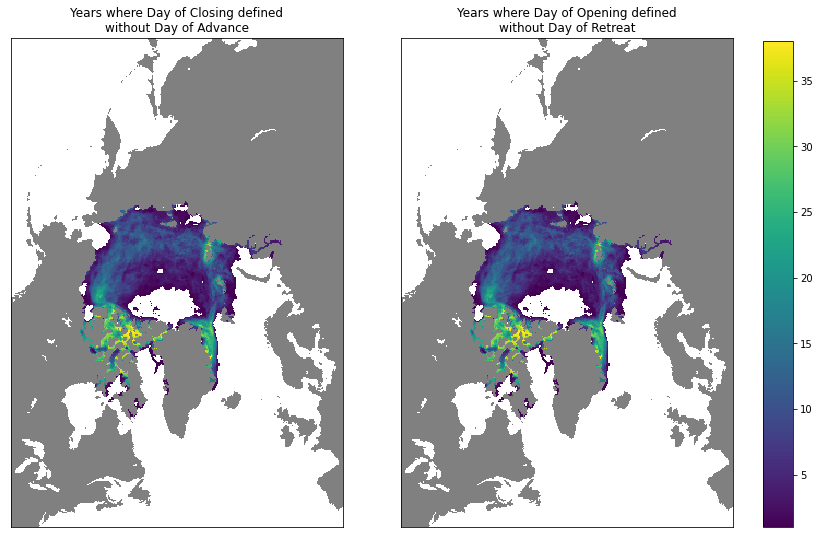

In [48]:
import copy
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


def prep_exclusive_counts(orac_ds, indicator1, indicator2):
    """Count instances where indicator1 is defined but not
    indicator2"""
    # create array for counting and set exclusive 
    # instances to 1 and sum to count
    exclusive_arr = np.zeros_like(orac_ds["DOC"].values)
    exclusive_arr[
        (orac_ds[indicator1].values > 0) & 
        (orac_ds[indicator2].values <= 0)
    ] = 1
    
    # prep for plotting with masking
    plot_arr = np.ma.masked_where(
        orac_ds["DOA"].values[0] == -4, 
        exclusive_arr.sum(axis=0)
    )
    
    return plot_arr


def plot_exclusive_counts(plot_arrs, titles):
    cmap = copy.copy(plt.cm.get_cmap("viridis"))
    cmap.set_under(color="white")
    cmap.set_bad(color="gray")
    fig, axs = plt.subplots(1, 2, figsize=(14, 9))
    for arr,ax,title in zip(plot_arrs, axs, titles):
        im = ax.imshow(arr, interpolation="none", cmap=cmap, vmin=1, vmax=38)
        ax.title.set_text(title)
        ax.set_xticks([])
        ax.set_yticks([])
    fig.subplots_adjust(wspace=0)
    cbar_ax = fig.add_axes([0.9, 0.125, 0.03, 0.75])
    fig.colorbar(im, cax=cbar_ax)
    plt.show()
    
    return


os.environ["BASE_DIR"] = "/workspace/Shared/Tech_Projects/SeaIce_NOAA_Indicators/project_data/"
base_dir = Path(os.getenv("BASE_DIR"))
# computed fubu dates fp
# fubu_fp = base_dir.joinpath("nsidc_0051/outputs/nsidc_0051_1979-2019_fubu.nc")
# path to sample converted file to get landmask array
#converted_fp = list(base_dir.joinpath("nsidc_0051/prepped").glob("*"))[0]

# load fubu dates netCDF
# set up meta data for saving GeoTIFFs
# with rio.open(converted_fp) as src:
#     # defined for global reference
#     fubu_landmask = src.read(1) == 254
#     # meta = src.meta

# fubu_ds = xr.load_dataset(fubu_fp)

orac_fp = base_dir.joinpath("nsidc_0747", "arctic_seaice_climate_indicators_nh_v01r01_1979-2017.nc")
orac_ds = xr.load_dataset(orac_fp)

# keys in this dict are indicators that may be defined
# even the conjugate indicator is not 
indicator_lu = {"DOC": "DOA", "DOO": "DOR"}
plot_arrs = [prep_exclusive_counts(orac_ds, i, indicator_lu[i]) for i in ["DOC", "DOO"]]
   
# plot data
titles = [
    "Years where Day of Closing defined\nwithout Day of Advance",
    "Years where Day of Opening defined\nwithout Day of Retreat",
]

plot_exclusive_counts(plot_arrs, titles)

But the converse conditions are not true:

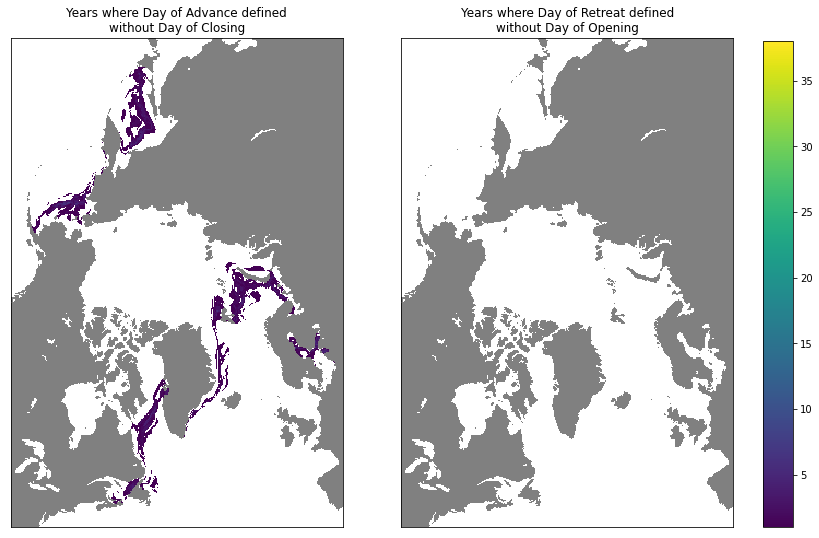

In [49]:
indicator_lu = {"DOA": "DOC", "DOR": "DOO"}
plot_arrs = [prep_exclusive_counts(orac_ds, i, indicator_lu[i]) for i in ["DOA", "DOR"]]
    
# plot data
titles = [
    "Years where Day of Advance defined\nwithout Day of Closing",
    "Years where Day of Retreat defined\nwithout Day of Opening",
]

plot_exclusive_counts(plot_arrs, titles)